<a href="https://colab.research.google.com/github/zulfanaliy/TM/blob/main/Analisa_Sentimen_Ulasan_di_Tokopedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada Notebook kali saya bagi menjadi 2 bagian di bagian ini saya akan melakukan pra pemrosessan data teks dari hasil scraping website Tokopedia serta analisa teks ulasan.

# Import data hasil scrape

In [63]:
import pandas as pd

In [64]:
pip install openpyxl

In [65]:
df = pd.read_excel("Ulasan di tokped_raw.xlsx")

Hasil scraping didapatkan ada 7 kolom yaitu kolom web-scraper-order, web-scraper-start-url, nama_produk, akun, ulasan, rating_komentar, dan nan. Data yang di scrape sebanyak 300 data dan bertipe data object.

In [66]:
data_tokped = df[['Nama_Produk', 'Akun', 'ulasan' ,'rate']]

data_tokped.head()

,Nama_Produk,Akun,ulasan,rate
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3


In [68]:
import nltk

In [69]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

Mengubah tipe data pada kolom ulasan menjadi string agar dapat melakukan pemrosesan data teks

In [70]:
data_tokped['ulasan'] = data_tokped['ulasan'].astype(str)

<ipython-input-70-f23825473e22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan'] = data_tokped['ulasan'].astype(str)


1. Case Folding (lower)

In [71]:
data_tokped['ulasan'] = data_tokped['ulasan'].str.lower()
data_tokped


<ipython-input-71-30a5d0f4c284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan'] = data_tokped['ulasan'].str.lower()


,Nama_Produk,Akun,ulasan,rate
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3
...,...,...,...,...
295,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1
296,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5
297,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5
298,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5


2. Tokenizing (Ditahap ini akan dilakukan proses number removal, whitecase removal, punctuation removal dan word_tokenize() untuk memecah string kedalam tokens)

In [72]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")

data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_links)

<ipython-input-72-142ec2f4c6d5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_links)


In [73]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_number)

<ipython-input-73-3f0d9e97f91b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_number)


In [74]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_punctuation)

<ipython-input-74-ba667792904e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_punctuation)


In [75]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_singl_char)

<ipython-input-75-c0c7971e0db8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan'] = data_tokped['ulasan'].apply(remove_singl_char)


In [76]:
# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_tokped['ulasan_tokenize'] = data_tokped['ulasan'].apply(word_tokenize_wrapper)

<ipython-input-76-3381b54415eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan_tokenize'] = data_tokped['ulasan'].apply(word_tokenize_wrapper)


Setelah proses diatas disimpan dalam kolom baru yaitu kolom ulasan_tokenize dimana data teks menyisakan kata yang sudah dipisah perkata dari kalimat.

In [77]:
data_tokped

,Nama_Produk,Akun,ulasan,rate,ulasan_tokenize
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"[keduakali, beli, tapi, sayang, yang, kedua, l..."
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"[bagus, pengiriman, cepat]"
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"[barang, sesuai, pesanan]"
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"[agak, panas, pas, dipakai]"
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"[barang, sesuai, permintaan, dan, bagus, namun..."
...,...,...,...,...,...
295,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1,"[barang, yg, dikirim, tdk, sesuai, deskripsi, ..."
296,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5,"[kotaknya, penyok, disana, sini, mngkn, dr, pi..."
297,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5,"[barang, sesuai, dan, kualitas, baik, cuma, ka..."
298,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5,"[dapet, harga, promo, jadi, murah, pengiriman,..."


In [81]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = data_tokped['ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(respon, 3), (tapi, 2), (dikirim, 2), (baru, ...
1            [(bagus, 1), (pengiriman, 1), (cepat, 1)]
2             [(barang, 1), (sesuai, 1), (pesanan, 1)]
3      [(agak, 1), (panas, 1), (pas, 1), (dipakai, 1)]
4    [(barang, 1), (sesuai, 1), (permintaan, 1), (d...
Name: ulasan_tokenize, dtype: object


3. Normalisasi ( Pada proses ini akan membersihkan kata yang berupa kata sehari-hari/slank words yang masih berantakan agar menjadi kata indonesia yang benar)

In [82]:
slank_word_dict = {
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [83]:
normalizad_word = pd.read_csv("Ulasan di tokped_raw.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [85]:
data_tokped['ulasan_normalized'] = data_tokped['ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

<ipython-input-85-be1276d40fb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan_normalized'] = data_tokped['ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)


Setelah proses diatas disimpan dalam kolom baru yaitu kolom ulasan_normalized dimana data teks menyisakan kata yang sudah dinormalisasi.

In [86]:
data_tokped

,Nama_Produk,Akun,ulasan,rate,ulasan_tokenize,ulasan_normalized
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"[keduakali, beli, tapi, sayang, yang, kedua, l...","[kedua kali, beli, tapi, sayang, yang, kedua, ..."
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"[bagus, pengiriman, cepat]","[bagus, pengiriman, cepat]"
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"[barang, sesuai, pesanan]","[barang, sesuai, pesanan]"
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"[agak, panas, pas, dipakai]","[sedikit, panas, saat, dipakai]"
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"[barang, sesuai, permintaan, dan, bagus, namun...","[barang, sesuai, permintaan, dan, bagus, namun..."
...,...,...,...,...,...,...
295,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1,"[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, dikirim, tdk, sesuai, deskripsi, ..."
296,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5,"[kotaknya, penyok, disana, sini, mngkn, dr, pi...","[kotaknya, penyok, disana, sini, mngkn, dr, pi..."
297,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5,"[barang, sesuai, dan, kualitas, baik, cuma, ka...","[barang, sesuai, dan, kualitas, baik, cuma, ka..."
298,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5,"[dapet, harga, promo, jadi, murah, pengiriman,...","[dapet, harga, promo, jadi, murah, pengiriman,..."


4. Filtering (Stopword Removal) Pada tahap ini kita akan menggunakan stopword bahasa indonesia yang didapatkan dari library NLTK untuk filtering terhadap Dataframe.

In [87]:
from nltk.corpus import stopwords

In [88]:
list_stopwords = stopwords.words('indonesian')

In [89]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_tokped['ulasan_stop_removed'] = data_tokped['ulasan_normalized'].apply(stopwords_removal)

<ipython-input-89-5b73b24e84e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan_stop_removed'] = data_tokped['ulasan_normalized'].apply(stopwords_removal)


Setelah proses diatas disimpan dalam kolom baru yaitu kolom ulasan_stop_removed dimana data teks menyisakan kata bermakna.

In [90]:
data_tokped

,Nama_Produk,Akun,ulasan,rate,ulasan_tokenize,ulasan_normalized,ulasan_stop_removed
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"[keduakali, beli, tapi, sayang, yang, kedua, l...","[kedua kali, beli, tapi, sayang, yang, kedua, ...","[kedua kali, beli, sayang, lambat, respon, ord..."
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"[bagus, pengiriman, cepat]","[bagus, pengiriman, cepat]","[bagus, pengiriman, cepat]"
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"[barang, sesuai, pesanan]","[barang, sesuai, pesanan]","[barang, sesuai, pesanan]"
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"[agak, panas, pas, dipakai]","[sedikit, panas, saat, dipakai]","[panas, dipakai]"
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"[barang, sesuai, permintaan, dan, bagus, namun...","[barang, sesuai, permintaan, dan, bagus, namun...","[barang, sesuai, permintaan, bagus, komunikasi..."
...,...,...,...,...,...,...,...
295,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1,"[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, dikirim, tdk, sesuai, deskripsi, ..."
296,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5,"[kotaknya, penyok, disana, sini, mngkn, dr, pi...","[kotaknya, penyok, disana, sini, mngkn, dr, pi...","[kotaknya, penyok, disana, mngkn, dr, expediai]"
297,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5,"[barang, sesuai, dan, kualitas, baik, cuma, ka...","[barang, sesuai, dan, kualitas, baik, cuma, ka...","[barang, sesuai, kualitas, kardusnya, penyok, ..."
298,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5,"[dapet, harga, promo, jadi, murah, pengiriman,...","[dapet, harga, promo, jadi, murah, pengiriman,...","[dapet, harga, promo, murah, pengiriman, promo]"


5. Stemming ( Mencari kata dasar dari sebuah kata/menghapus imbuhan kata )

In [91]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [92]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=0e1c31a884a189908f222cc86699f515caa24cbbea659f7e12f2246b175aef65
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [95]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_tokped['ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_tokped['ulasan_Stemmed'] = data_tokped['ulasan_stop_removed'].swifter.apply(get_stemmed_term)

628
------------------------
kedua kali : dua kali
beli : beli
sayang : sayang
lambat : lambat
respon : respon
order : order
pagi : pagi
dikirim : kirim
sore : sore
itupun : itu
besoknya : besok
barang : barang
bagus : bagus
sesuai : sesuai
harga : harga
pengiriman : kirim
cepat : cepat
pesanan : pesan
panas : panas
dipakai : pakai
permintaan : minta
komunikasi : komunikasi
penjual : jual
pembeli : beli
pro : pro
aktif : aktif
maskernya : masker
pengirimn : pengirimn
cepet : cepet
produknya : produk
konsumen : konsumen
suka makasih : suka makasih
proses : proses
dijemput : jemput
kurir : kurir
banget : banget
anjas : anjas
pokoknya : pokok
mantabspesan : mantabspesan
yg : yg
warna : warna
hitam : hitam
putih : putih
pink : pink
ramah : ramah
diterima : terima
aman : aman
nan : nan
kecewa : kecewa
berat : berat
dgn : dgn
masker : masker
hijab : hijab
hitamnya : hitam
tali : tali
gampang : gampang
putus : putus
krn : krn
pendek : pendek
estimasi : estimasi
terbaik : baik
karet : karet
he

Pandas Apply:   0%|          | 0/300 [00:00<?, ?it/s]

<ipython-input-95-319bc73aca02>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped['ulasan_Stemmed'] = data_tokped['ulasan_stop_removed'].swifter.apply(get_stemmed_term)


Setelah proses diatas disimpan dalam kolom baru yaitu kolom ulasan_stemmed dimana data teks menyisakan kata yang sudah di stemming.

In [96]:
data_tokped

,Nama_Produk,Akun,ulasan,rate,ulasan_tokenize,ulasan_normalized,ulasan_stop_removed,ulasan_Stemmed
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"[keduakali, beli, tapi, sayang, yang, kedua, l...","[kedua kali, beli, tapi, sayang, yang, kedua, ...","[kedua kali, beli, sayang, lambat, respon, ord...","[dua kali, beli, sayang, lambat, respon, order..."
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"[bagus, pengiriman, cepat]","[bagus, pengiriman, cepat]","[bagus, pengiriman, cepat]","[bagus, kirim, cepat]"
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"[barang, sesuai, pesanan]","[barang, sesuai, pesanan]","[barang, sesuai, pesanan]","[barang, sesuai, pesan]"
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"[agak, panas, pas, dipakai]","[sedikit, panas, saat, dipakai]","[panas, dipakai]","[panas, pakai]"
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"[barang, sesuai, permintaan, dan, bagus, namun...","[barang, sesuai, permintaan, dan, bagus, namun...","[barang, sesuai, permintaan, bagus, komunikasi...","[barang, sesuai, minta, bagus, komunikasi, jua..."
...,...,...,...,...,...,...,...,...
295,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1,"[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, kirim, tdk, sesuai, deskripsi, te..."
296,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5,"[kotaknya, penyok, disana, sini, mngkn, dr, pi...","[kotaknya, penyok, disana, sini, mngkn, dr, pi...","[kotaknya, penyok, disana, mngkn, dr, expediai]","[kotak, penyok, sana, mngkn, dr, expediai]"
297,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5,"[barang, sesuai, dan, kualitas, baik, cuma, ka...","[barang, sesuai, dan, kualitas, baik, cuma, ka...","[barang, sesuai, kualitas, kardusnya, penyok, ...","[barang, sesuai, kualitas, kardus, penyok, nex..."
298,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5,"[dapet, harga, promo, jadi, murah, pengiriman,...","[dapet, harga, promo, jadi, murah, pengiriman,...","[dapet, harga, promo, murah, pengiriman, promo]","[dapet, harga, promo, murah, kirim, promo]"


In [97]:
data_tokped["ulasan_clean"] = [' '.join(map(str, l)) for l in data_tokped['ulasan_Stemmed']]

<ipython-input-97-6d29cb89e048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tokped["ulasan_clean"] = [' '.join(map(str, l)) for l in data_tokped['ulasan_Stemmed']]


Setelah proses diatas disimpan dalam kolom baru yaitu kolom ulasan_clean dimana saya menggabungkan lagi kalimat yang sebelumnya sudah ditokenisasi dan dibersihkan.

In [98]:
data_tokped

,Nama_Produk,Akun,ulasan,rate,ulasan_tokenize,ulasan_normalized,ulasan_stop_removed,ulasan_Stemmed,ulasan_clean
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,keduakali beli tapi sayang yang kedua lambat d...,3,"[keduakali, beli, tapi, sayang, yang, kedua, l...","[kedua kali, beli, tapi, sayang, yang, kedua, ...","[kedua kali, beli, sayang, lambat, respon, ord...","[dua kali, beli, sayang, lambat, respon, order...",dua kali beli sayang lambat respon order pagi ...
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus pengiriman cepat,5,"[bagus, pengiriman, cepat]","[bagus, pengiriman, cepat]","[bagus, pengiriman, cepat]","[bagus, kirim, cepat]",bagus kirim cepat
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesanan,4,"[barang, sesuai, pesanan]","[barang, sesuai, pesanan]","[barang, sesuai, pesanan]","[barang, sesuai, pesan]",barang sesuai pesan
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,agak panas pas dipakai,5,"[agak, panas, pas, dipakai]","[sedikit, panas, saat, dipakai]","[panas, dipakai]","[panas, pakai]",panas pakai
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai permintaan dan bagus namun komun...,3,"[barang, sesuai, permintaan, dan, bagus, namun...","[barang, sesuai, permintaan, dan, bagus, namun...","[barang, sesuai, permintaan, bagus, komunikasi...","[barang, sesuai, minta, bagus, komunikasi, jua...",barang sesuai minta bagus komunikasi jual beli...
...,...,...,...,...,...,...,...,...,...
295,Buy 1 Get 1 - Masker Primero - Sachet,a***a,barang yg dikirim tdk sesuai deskripsi tidak t...,1,"[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, dikirim, tdk, sesuai, deskripsi, ...","[barang, yg, kirim, tdk, sesuai, deskripsi, te...",barang yg kirim tdk sesuai deskripsi tera ijin...
296,Buy 1 Get 1 - Masker Primero - Sachet,Teguh,kotaknya penyok disana sini mngkn dr pihak exp...,5,"[kotaknya, penyok, disana, sini, mngkn, dr, pi...","[kotaknya, penyok, disana, sini, mngkn, dr, pi...","[kotaknya, penyok, disana, mngkn, dr, expediai]","[kotak, penyok, sana, mngkn, dr, expediai]",kotak penyok sana mngkn dr expediai
297,Buy 1 Get 1 - Masker Primero - Sachet,F***a,barang sesuai dan kualitas baik cuma kardusnya...,5,"[barang, sesuai, dan, kualitas, baik, cuma, ka...","[barang, sesuai, dan, kualitas, baik, cuma, ka...","[barang, sesuai, kualitas, kardusnya, penyok, ...","[barang, sesuai, kualitas, kardus, penyok, nex...",barang sesuai kualitas kardus penyok next time...
298,Buy 1 Get 1 - Masker Primero - Sachet,N***a,dapet harga promo jadi murah pengiriman agak l...,5,"[dapet, harga, promo, jadi, murah, pengiriman,...","[dapet, harga, promo, jadi, murah, pengiriman,...","[dapet, harga, promo, murah, pengiriman, promo]","[dapet, harga, promo, murah, kirim, promo]",dapet harga promo murah kirim promo


Menyimpan output dalam bentuk excel

In [99]:
data_tokped.to_excel("tokped_text.xlsx")

# Word Distribution

In [101]:
ulasan = ' '.join(str(v) for v in data_tokped['ulasan_clean'])

In [102]:
tokenize_ulasan = word_tokenize(ulasan)

In [103]:
tokenize_ulasan

['dua',
 'kali',
 'beli',
 'sayang',
 'lambat',
 'respon',
 'order',
 'pagi',
 'kirim',
 'sore',
 'respon',
 'respon',
 'itu',
 'kirim',
 'besok',
 'barang',
 'bagus',
 'sesuai',
 'harga',
 'bagus',
 'kirim',
 'cepat',
 'barang',
 'sesuai',
 'pesan',
 'panas',
 'pakai',
 'barang',
 'sesuai',
 'minta',
 'bagus',
 'komunikasi',
 'jual',
 'beli',
 'pro',
 'aktif',
 'bagus',
 'masker',
 'pengirimn',
 'cepet',
 'produk',
 'bagus',
 'konsumen',
 'suka',
 'makasih',
 'barang',
 'sesuai',
 'pesan',
 'kirim',
 'cepat',
 'proses',
 'barang',
 'jemput',
 'kurir',
 'banget',
 'anjas',
 'pokok',
 'mantabspesan',
 'yg',
 'warna',
 'hitam',
 'putih',
 'pink',
 'kirim',
 'cepat',
 'sesuai',
 'pesan',
 'respon',
 'jual',
 'cepat',
 'ramah',
 'barang',
 'terima',
 'sesuai',
 'pesan',
 'aman',
 'nan',
 'kecewa',
 'berat',
 'dgn',
 'masker',
 'hijab',
 'warna',
 'hitam',
 'tali',
 'masker',
 'gampang',
 'putus',
 'krn',
 'tali',
 'masker',
 'pendek',
 'kirim',
 'sesuai',
 'estimasi',
 'baik',
 'karet',
 '

In [104]:
fqdist = FreqDist(tokenize_ulasan)

In [105]:
fqdist

FreqDist({'barang': 77, 'sesuai': 69, 'cepat': 68, 'bagus': 64, 'masker': 57, 'kirim': 56, 'beli': 32, 'yg': 30, 'pesan': 29, 'terima': 25, ...})

In [106]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('barang', 77),
 ('sesuai', 69),
 ('cepat', 68),
 ('bagus', 64),
 ('masker', 57),
 ('kirim', 56),
 ('beli', 32),
 ('yg', 30),
 ('pesan', 29),
 ('terima', 25),
 ('respon', 24),
 ('kualitas', 23),
 ('nya', 22),
 ('packing', 22),
 ('banget', 18)]

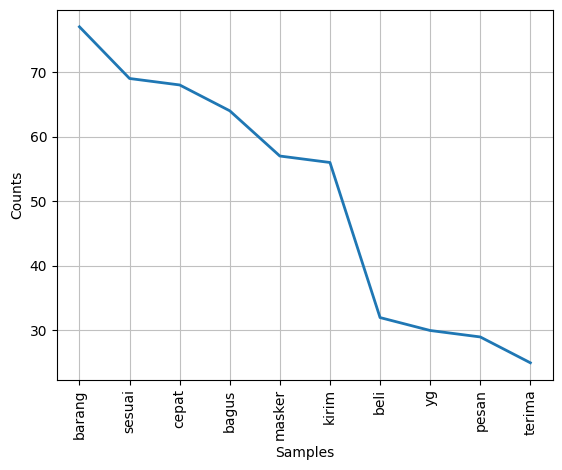

In [107]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

> Hasil yang dapat dilihat dari visualisasi persebaran kata yang paling banyak muncul yaitu kata 'barang' yang merupakan kata ganti yang mendefinisikan produk yang dibeli, selanjutnya ada kata 'cepat, sesuai, bagus' ini berarti ulasan yang lebih banyak diberikan pembeli di marketplace tokopedia lebih banyak pada sentimen positif ke-3 aspek penilaian itu, lalu kata masker, kirim, beli, terima, pesan, respon, dst.